Goal - Implement standard QPE with simple controlled-phase unitary, known eigenstate


/var/folders/p2/r0zl4pzj01z9f25h559679jw0000gn/T/ipykernel_30401/484662583.py:26: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  QFT(4, inverse=True, do_swaps=True),


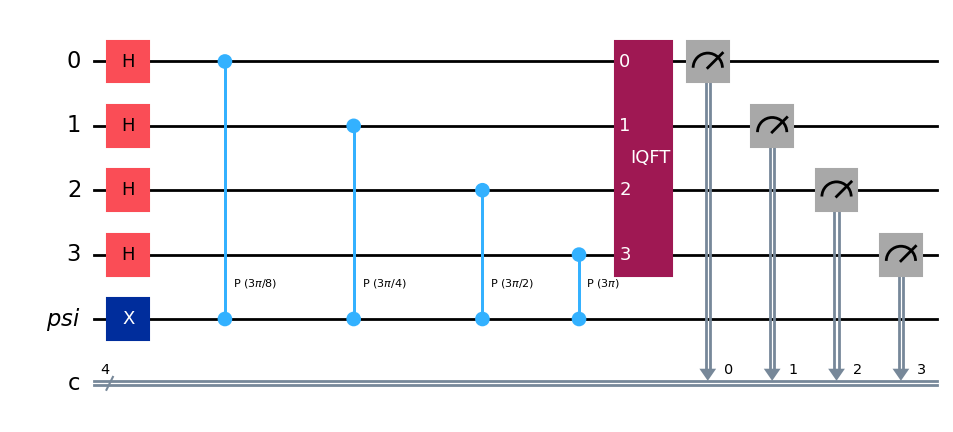

In [6]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.circuit.library import QFT
import numpy as np
#n = 4 , ancilla has 4 bits
zero = QuantumRegister(1, "0") 
one = QuantumRegister(1, "1")
two = QuantumRegister(1, "2")
three = QuantumRegister(1, "3")
psi = QuantumRegister(1, "psi") #system qubit, where the U operator acts on and enables phase kickback
qc = QuantumCircuit(zero, one, two, three, psi, ClassicalRegister(4, "c"))
#already init to 0 state to prepare for superposition
qc.h(zero[0])
qc.h(one[0])
qc.h(two[0])
qc.h(three[0])
#all ancilla qubits are now in superposition via hadamard gates
#connected the ancilla qubits to the system qubit via controlled U operations, for qubit 0 it will be U^2^0
qc.x(psi) #preparing |1> state for phase kickback, making it an eigenstate of U. This is the formula U|1> = e^(iφ)|1> for phase kickback
theta = 3 * np.pi / 8   # corresponds to φ = 3/16, phase will be kicked back to ancilla qubits
qc.cp(theta, zero[0], psi[0]) #cp is controlled phase gate = controlled U, 0 is control qubit and psi is target
qc.cp(2 * theta, one[0], psi[0]) #for qubit 1 it will be U^2^1 etc
qc.cp(4 * theta, two[0], psi[0])  #basically just going to each bit
qc.cp(8 * theta, three[0], psi[0])
#inverse QFT on ancilla qubits
qc.append(
    QFT(4, inverse=True, do_swaps=True),
    [zero[0], one[0], two[0], three[0]]
)

qc.measure(zero, 0)
qc.measure(one, 1)
qc.measure(two, 2)
qc.measure(three, 3)
qc.draw('mpl')


Measured phase bitstring: 0011


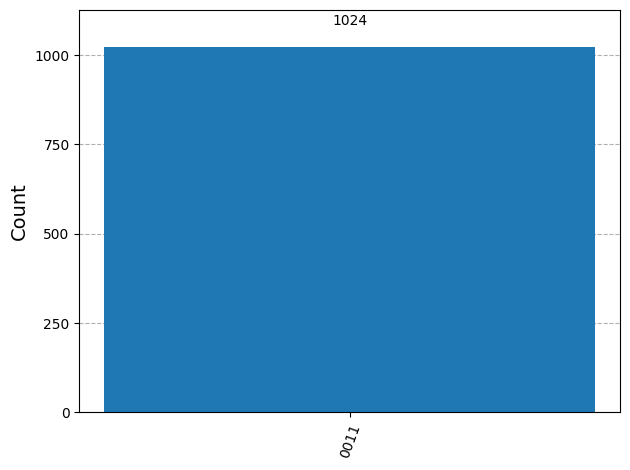

In [ ]:
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
backend = Aer.get_backend("qasm_simulator")
qc_t = transpile(qc, backend) #maps gates and qubits to the simulator's native representation
job = backend.run(qc_t, shots=1024) #run the job on the simulator
result = job.result() #get the results from the job
counts = result.get_counts(qc_t) #get the counts of each measured bitstring
most_likely = max(counts, key=counts.get) #find the bitstring with the highest count
print("Measured phase bitstring:", most_likely) #print the most likely bitstring
plot_histogram(counts) #no noise ideal example
